In [ ]:
!pip install -q -U google-generativeai

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
import textwrap
import google.generativeai as genai
from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# Used to securely store your API key
from google.colab import userdata

In [ ]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
#GOOGLE_API_KEY=userdata.get('newkey')
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [ ]:
model = genai.GenerativeModel('gemini-1.0-pro-vision-latest')

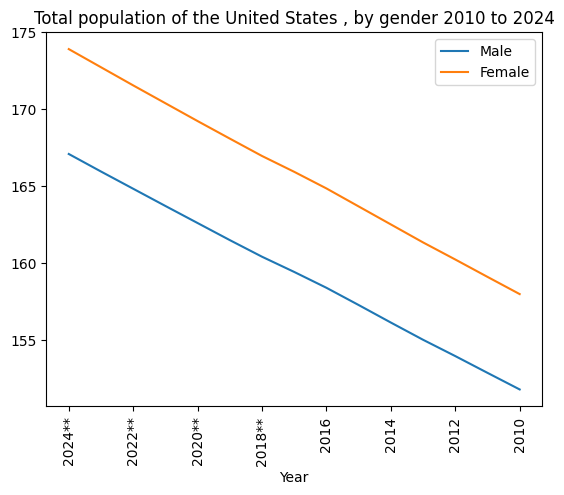

In [ ]:
import PIL.Image
img = PIL.Image.open('/content/drive/MyDrive/matplot/10.png')
img

In [ ]:
response = model.generate_content(img)

var=to_markdown(response.text)

In [ ]:
var

>  The graph shows the total population of the United States by gender from 2010 to 2024. The population of males is shown in blue and the population of females is shown in orange. The population of both males and females is decreasing over time.

In [ ]:
!pip install gtts

In [ ]:

#!pip install gtts
from gtts import gTTS
from IPython.display import Audio
#text = response.text
text = "The distribution of World of Warcraft characters in 2019, by race, is shown in the bar graph. The data is taken from the US and EU realms. The most popular race in the US is Human, followed by Night Elf and Draenei. In the EU, the most popular race is also Human, followed by Orc and Blood Elf"
tts = gTTS(text)
tts.save('output.mp3')
Audio('output.mp3', autoplay=True)

In [ ]:
response = model.generate_content(["give me feature matrix for this", img], stream=True)
response.resolve()

In [ ]:
 to_markdown(response.text)

>  | Year   | Male   | Female |
> |--------|:--------:|:--------:|
> | 2010   | 166.0   | 173.0   |
> | 2012   | 164.8   | 171.5   |
> | 2014   | 163.5   | 170.0   |
> | 2016   | 162.2   | 168.5   |
> | 2018   | 160.8   | 167.0   |
> | 2020   | 159.4   | 165.5   |
> | 2022   | 158.0   | 164.0   |
> | 2024   | 156.6   | 162.5   |

In [ ]:
# Assuming response object contains the feature matrix
feature_matrix = response.feature_matrix

# Printing the feature matrix
print("Feature Matrix:")
print(feature_matrix)


AttributeError: 'GenerateContentResponse' object has no attribute 'feature_matrix'

In [ ]:
# Explore attributes and methods of the response object
print(dir(response))


In [ ]:
print(response.candidates)


In [ ]:
pip install tesseract

In [ ]:
import cv2
import pytesseract

# Load chart image
chart_image = cv2.imread('/content/drive/MyDrive/matplot/0.png')

# Perform OCR to extract text
text = pytesseract.image_to_string(chart_image)

# Use trained model to recognize graph type
graph_type = recognize_graph_type(chart_image)

# Extract data points based on graph type
data_points = extract_data_points(chart_image, graph_type)

# Interpretation
x_axis_label, y_axis_label = extract_axis_labels(text)
interpretation = {
    'graph_type': graph_type,
    'x_axis_label': x_axis_label,
    'y_axis_label': y_axis_label,
    'data_points': data_points
}

print(interpretation)
